In [18]:
from datasets import load_dataset
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as patches
from PIL import Image
from pycocotools import mask as coco_mask

In [12]:
dataset = load_dataset("keremberke/satellite-building-segmentation", "full")

Found cached dataset satellite-building-segmentation (/h/vkhazaie/.cache/huggingface/datasets/keremberke___satellite-building-segmentation/full/1.0.0/2d4f5155d8a688bdff0915214924fbee078bcc85eb80f4d3c5884b8e319ec0ea)


  0%|          | 0/3 [00:00<?, ?it/s]

In [13]:
idx = 10

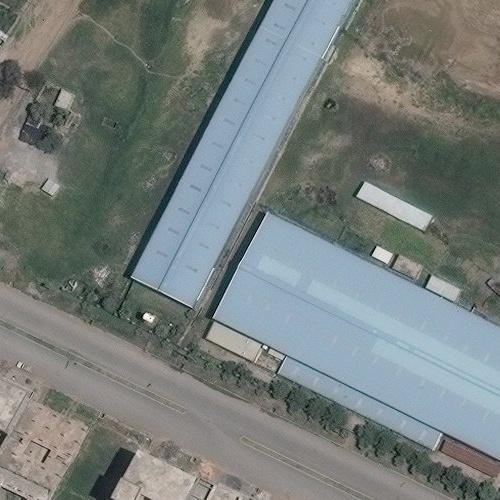

In [14]:
example = dataset['train'][idx]
image = example["image"]
image

In [21]:
dataset["train"]["objects"][idx]['bbox']

[[131.0, 0.0, 232.6999969482422, 309.29998779296875],
 [17.0, 82.0, 62.459999084472656, 74.23999786376953],
 [0.0, 376.0, 92.27999877929688, 123.69999694824219],
 [109.0, 449.0, 108.58000183105469, 51.290000915527344],
 [206.0, 321.0, 57.599998474121094, 41.599998474121094],
 [277.0, 356.0, 165.9600067138672, 95.81999969482422],
 [213.0, 212.0, 287.3399963378906, 250.1699981689453],
 [356.0, 181.0, 78.68000030517578, 52.29999923706055],
 [372.0, 246.0, 21.559999465942383, 18.5],
 [391.0, 254.0, 32.189998626708984, 26.18000030517578],
 [425.0, 274.0, 36.54999923706055, 28.639999389648438],
 [41.0, 179.0, 17.799999237060547, 16.200000762939453]]

In [22]:
dataset["train"]["objects"][idx]['segmentation']

[[[273.29998779296875,
   0.0,
   131.0399932861328,
   277.55999755859375,
   158.5800018310547,
   290.3999938964844,
   193.10000610351562,
   308.1000061035156,
   199.1999969482422,
   309.29998779296875,
   363.739990234375,
   0.4000000059604645,
   355.7099914550781,
   0.4000000059604645,
   305.2699890136719,
   0.4000000059604645,
   297.29998779296875,
   0.0,
   273.29998779296875,
   0.0]],
 [[67.91000366210938,
   134.4199981689453,
   55.599998474121094,
   129.8699951171875,
   56.91999816894531,
   125.9000015258789,
   71.5,
   130.39999389648438,
   79.80000305175781,
   114.0,
   69.41999816894531,
   109.04000091552734,
   76.80999755859375,
   94.45999908447266,
   46.130001068115234,
   81.58000183105469,
   24.0,
   123.0999984741211,
   17.34000015258789,
   138.9600067138672,
   54.27000045776367,
   155.82000732421875,
   67.91000366210938,
   134.4199981689453]],
 [[50.630001068115234,
   500.0,
   92.27999877929688,
   428.6600036621094,
   32.220001220703

In [23]:
def show_bounding_boxes(image, bounding_boxes):
    # Create a figure and axes
    fig, ax = plt.subplots(1)

    # Display the image
    ax.imshow(image)

    # Plot bounding boxes
    for bbox in bounding_boxes:
        x, y, width, height = bbox
        rect = patches.Rectangle((x, y), width, height, linewidth=1, edgecolor='r', facecolor='none')
        ax.add_patch(rect)

    # Configure plot settings
    ax.axis('off')
    plt.show()

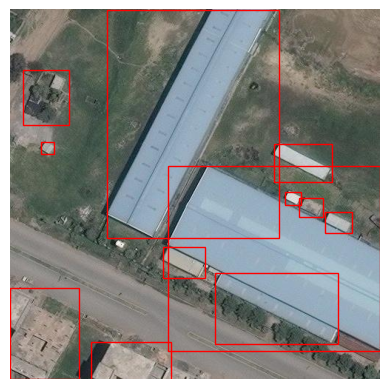

In [24]:
show_bounding_boxes(dataset["train"]["image"][idx], dataset["train"]["objects"][idx]['bbox'])

In [25]:
def get_segmentation_mask(segmentation_label):
    # Convert COCO segmentation label to binary mask
    binary_mask= np.zeros((500, 500, 1))
    for seg_lbl in segmentation_label['segmentation']:
        rle = coco_mask.frPyObjects(seg_lbl, 500, 500)
        binary_mask += coco_mask.decode(rle)
    
    return binary_mask

In [26]:
mask = get_segmentation_mask(dataset["train"]["objects"][idx])

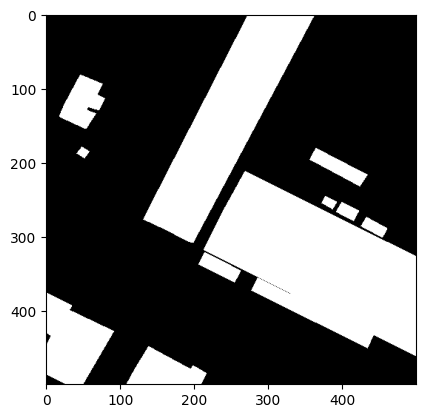

In [27]:
plt.imshow(mask, cmap="gray")

In [1]:
from samgeo.text_sam import LangSAM

Installing GroundingDINO...
Defaulting to user installation because normal site-packages is not writeable
Please restart the kernel and run the notebook again.


In [2]:
sam = LangSAM()

NameError: name 'hf_hub_download' is not defined